### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_)
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [41]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [42]:
aMin = -5
aMax = 5
aSkok = 0.05
bMin = -100
bMax = 100
bSkok = 1

def hough_trad_line(image):
    A = np.arange(aMin, aMax, aSkok)
    B = np.arange(bMin, bMax, bSkok)

    H = np.zeros((A.shape[0], B.shape[0]))

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y]:
                for a_idx, a in enumerate(A):
                    b = y - a*x
                    b_idx = np.argmin(abs(B - b))

                    H[a_idx, b_idx] += 1

    return H

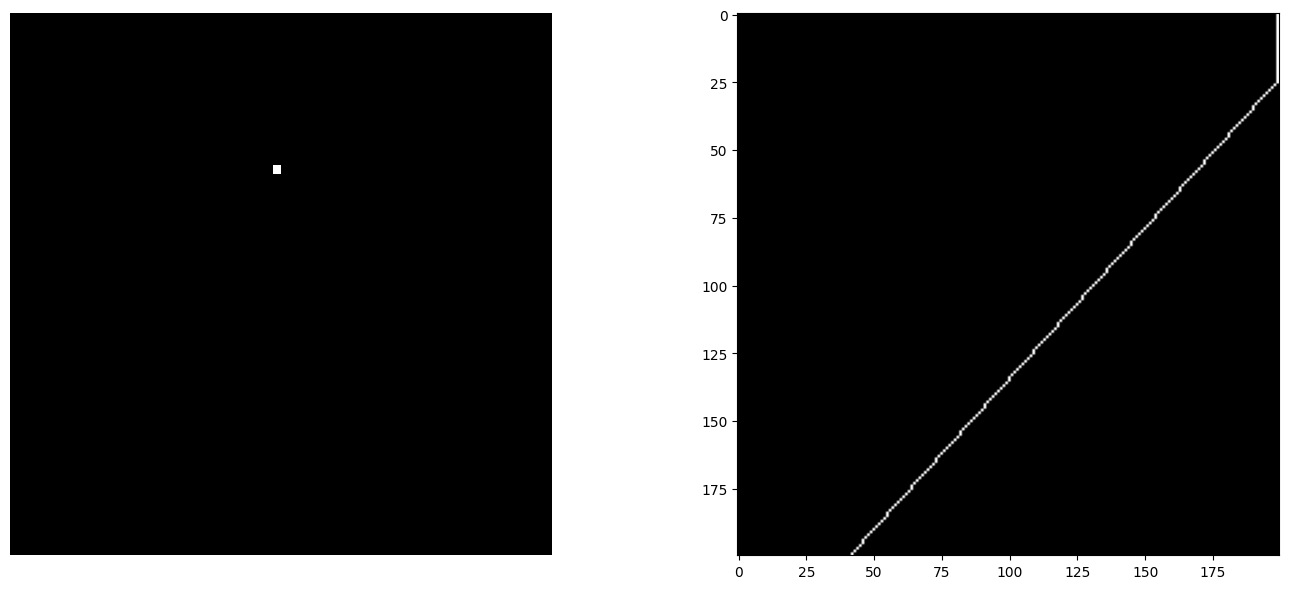

In [43]:
im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(im, 'gray')
ax[0].axis('off')
ax[1].imshow(hough_trad_line(im), 'gray')

plt.tight_layout()
plt.show()

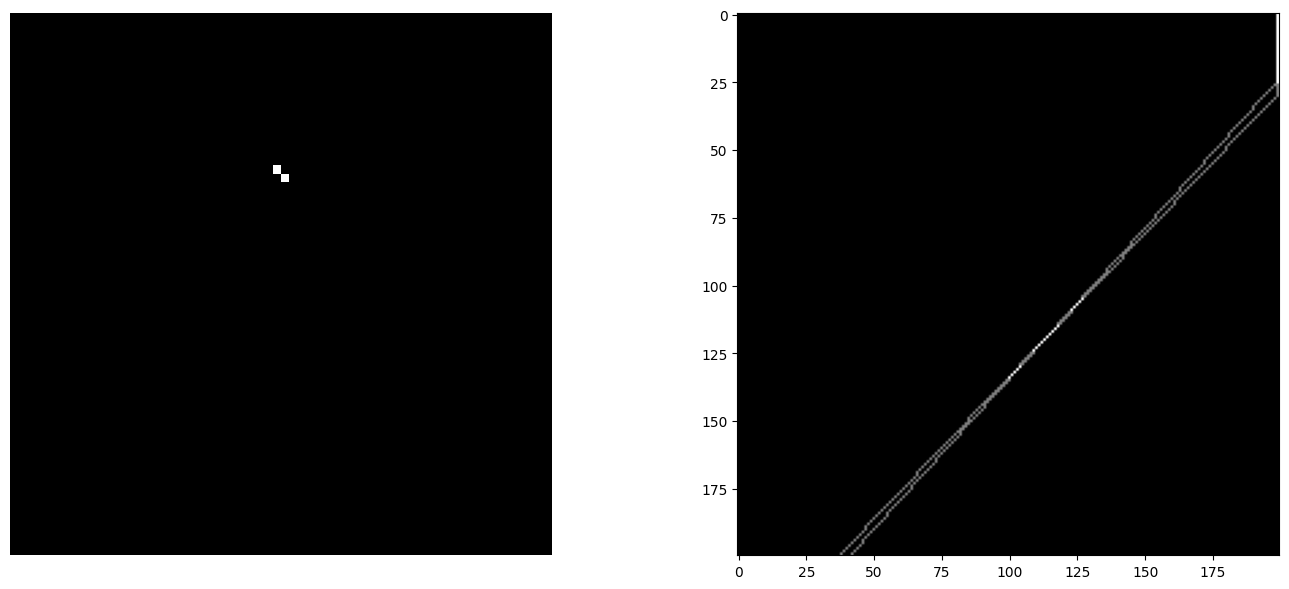

In [44]:
im[19, 32] = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(im, 'gray')
ax[0].axis('off')
ax[1].imshow(hough_trad_line(im), 'gray')

plt.tight_layout()
plt.show()

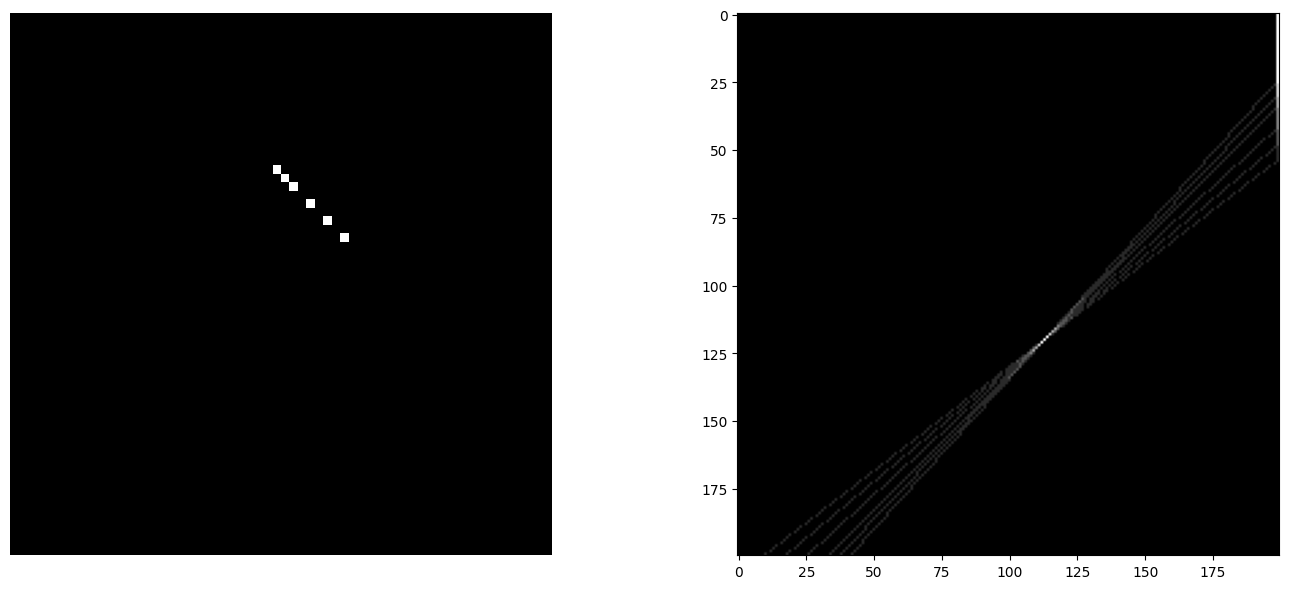

In [45]:
im[20, 33] = 1
im[22, 35] = 1
im[24, 37] = 1
im[26, 39] = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(im, 'gray')
ax[0].axis('off')
ax[1].imshow(hough_trad_line(im), 'gray')

plt.tight_layout()
plt.show()

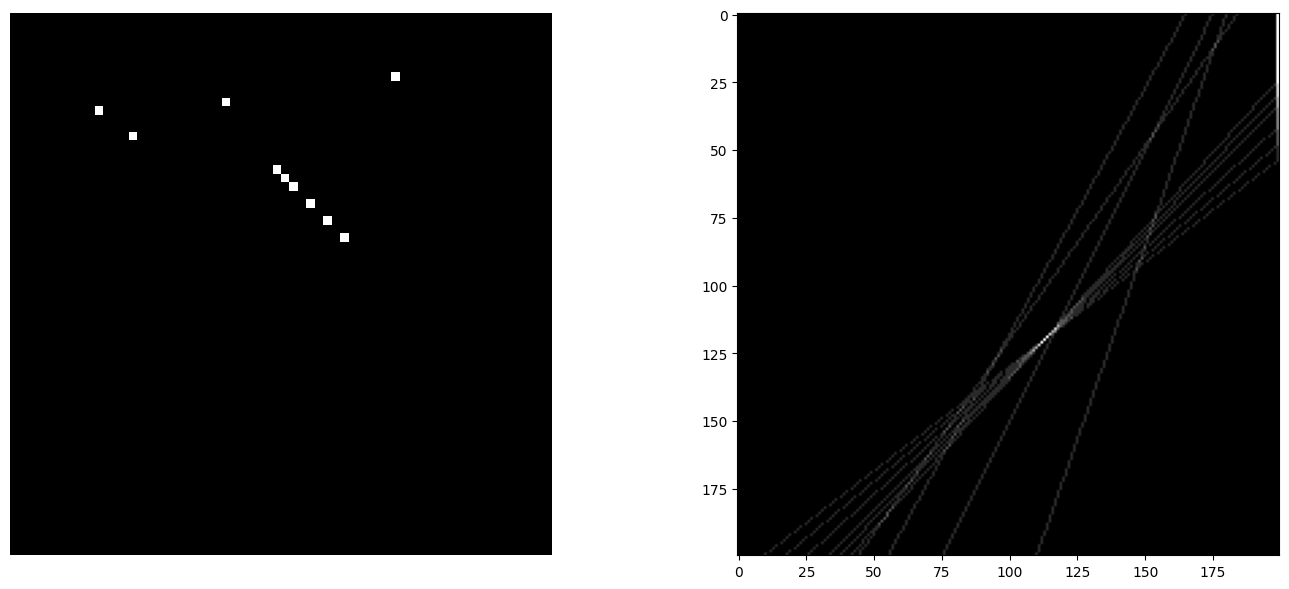

In [46]:
im[10, 25] = 1
im[7, 45] = 1
im[11, 10] = 1
im[14, 14] = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(im, 'gray')
ax[0].axis('off')
ax[1].imshow(hough_trad_line(im), 'gray')

plt.tight_layout()
plt.show()